In [10]:
#IMPORTS
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [11]:
#MODIFIER DOMAIN VARIABLES

def mod_func_A(x):
    return x**2

def mod_func_B(x):
    return x*2/3


def rescaler(old_list, new_min, new_max):
    new_values=[]
    for old_value in old_list:
        new_values.append((((old_value - min(old_list)) * (new_max - new_min)) / (max(old_list) - min(old_list)))+ new_min)

    return new_values

# datapoints domain (min-max), min_mod_increment, max_mod_increment 
mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
#mdv["modifier_data_point"] = 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])], selected_mod_function=mod_func_A, do_plot=False):
    # Function to control modifiers given the input and the selected modifier function. Option to plot or not. 
    
    print("Modifier controller...")
    print(interval_list)
    all_interval_mod = []
    
    # Check if it's possible to generate more data points
    if mdv["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        return False  # Exit the function if not possible
    
    for i in range(len(interval_list)):
        interval_min_range = interval_list[i][0]
        interval_max_range = interval_list[i][1]
        
        # Generate data points (incremental ticks and function modified x values) within the specified interval
        mod_ticks = np.arange(interval_min_range, interval_max_range, mdv["modifier_data_point"])
        mod_x = selected_mod_function(mod_ticks)
        
        # Normalize the function outputs to fit within the interval range
        mod_x = rescaler(mod_x, new_max=interval_max_range, new_min=interval_min_range)
        print(mod_x)
        all_interval_mod.append(mod_x)
    
    # update the mdv to decrease the interdatapoint distance for the next itteration
    mdv["modifier_data_point"] = mdv["modifier_data_point"] - mdv["modifier_incremental_unit"]
    
    if do_plot == True:
        # Plot the generated data points
        for mod_x in all_interval_mod:
            plt.scatter(mod_x, np.ones(np.shape(mod_x)))
            plt.show()
    
    return all_interval_mod


In [13]:
#SIMULATOR - data substitution in Sim function
def sim_func_A(x):
    noise = np.random.normal(-10000,10000,len(x))
    return x**3-x**2+noise

def sim_func_B(x):
    return x*2/3

def simulator(mod_x, selected_function=sim_func_A):
    print("Simulator...")
    # mod_points = modifier_controller()
    simulated_y = selected_function(np.array(mod_x))
    return simulated_y


Modifier controller...
[(1, 100)]
[1.0, 2.4347826086956523, 6.260869565217392, 12.478260869565217, 21.08695652173913, 32.086956521739125, 45.47826086956522, 61.26086956521739, 79.43478260869566, 100.0]
Simulator...
Modifier controller...
[[1, 50], [60, 90]]
[1.0, 2.6704545454545454, 6.9393939393939394, 13.806818181818182, 23.272727272727273, 35.33712121212121, 50.0]
[60.0, 66.4358108108108, 73.58108108108108, 81.4358108108108, 90.0]
Simulator...
Simulator...
Modifier controller...
[[25, 50], [75, 90]]
[25.0, 28.04054054054054, 31.53153153153153, 35.472972972972975, 39.86486486486486, 44.707207207207205, 50.0]
[75.0, 79.75308641975309, 84.75308641975309, 90.0]
Simulator...
Simulator...


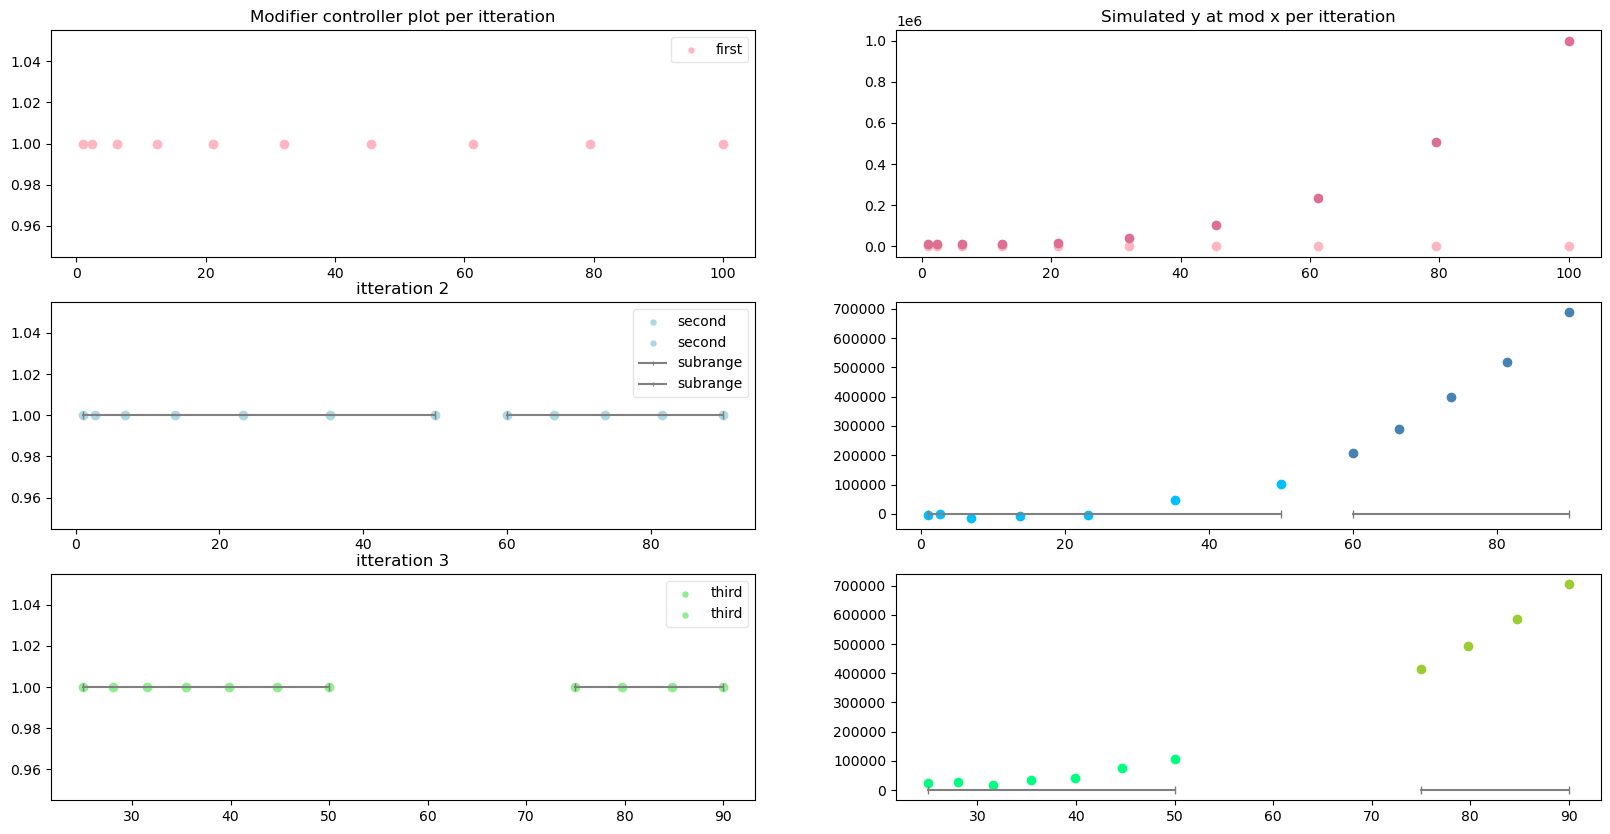

In [14]:
# PLACEHOLDER FOR THE MAIN FUNCTION
mainfunc=True
while mainfunc==True:
    # datapoints domain (min-max), min_mod_increment, max_mod_increment 
    mdv={"domain_min_range":1, "domain_max_range":100, "modifier_incremental_unit":3, "modifier_data_point":10}
    #mdv["modifier_data_point"] = 2


    plt.figure(figsize = (20,10))
    appendedvars=[]

    plt.subplot(321)
    plt.title('Modifier controller plot per itteration')
    var1 = modifier_controller(interval_list=[(mdv["domain_min_range"], mdv["domain_max_range"])],do_plot=False,selected_mod_function=mod_func_A)
    plt.scatter(var1, np.ones(np.shape(var1)),label='first',color='lightpink')
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars.append(var1)


    plt.subplot(322)
    plt.title('Simulated y at mod x per itteration')
    simy = simulator(mod_x=var1,selected_function=sim_func_A)
    assert np.shape(var1) == np.shape(simy)
    plt.scatter(var1,np.ones(np.shape(var1)),color='lightpink')
    plt.scatter(var1,simy,color='palevioletred')

    plt.subplot(323)
    plt.title('itteration 2')
    ranges=[[1,50],[60,90]]
    var2 = modifier_controller(ranges,do_plot=False)
    for vars in var2:
        plt.scatter(vars, np.ones(np.shape(vars)),label='second',color='lightblue')
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray',label='subrange') for i in [0,1]]
    appendedvars.append(var2)
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars=[val for val in appendedvars]

    plt.subplot(324)
    mod_x=var2 #not var2
    colors=[['deepskyblue'],['steelblue']]
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray',label='subrange') for i in [0,1]]
    for i in range(np.shape(ranges)[0]):
        simy = simulator(mod_x[i],selected_function=sim_func_A)
        assert np.shape(mod_x[i]) == np.shape(simy)
        # plt.scatter(mod_x,np.ones(np.shape(mod_x)))
        plt.scatter(mod_x[i],simy,color=colors[i])


    plt.subplot(325)
    plt.title('itteration 3')
    ranges = [[25,50],[75,90]] # USE VALIDATOR FUNCTION TO GET NEW RANGES if enough itterations
    var3 = modifier_controller(ranges,do_plot=False)
    for vars in var3:
        plt.scatter(vars, np.ones(np.shape(vars)),label='third',color='lightgreen')
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray') for i in [0,1]]
    appendedvars.append(var3)
    plt.legend(framealpha=0.5, markerscale=0.6)
    appendedvars=[val for val in appendedvars]


    plt.subplot(326)
    mod_x=var3 #not var2
    colors=[['springgreen'],['yellowgreen']]
    [plt.plot(ranges[i],np.ones(np.shape(ranges[i])),marker='|', color='gray') for i in [0,1]]
    for i in range(np.shape(ranges)[0]):
        simy = simulator(mod_x[i],selected_function=sim_func_A)
        assert np.shape(mod_x[i]) == np.shape(simy)
        # plt.scatter(mod_x,np.ones(np.shape(mod_x)))
        plt.scatter(mod_x[i],simy,color=colors[i])
    plt.show()
    
    mainfunc = False

In [15]:
# https://stackoverflow.com/questions/39434402/how-to-get-confidence-intervals-from-curve-fit

In [72]:
# Validator class, that will have information about the histroy of simulator ranges that are within the threshhol. 
# Otherwise, rerun modifier + simulator until ranges are within threshhold OR no more itteration are possible.

def rsquare():
    y_mean = sum(simy) / len(simy)
    ss_total = sum([(y - y_mean) ** 2 for y in mody])
    ss_residual = sum([(mody[i] - simy[i]) ** 2 for i in range(len(mody))])
    print(ss_residual)
    r_squared = 1 - (ss_residual / ss_total)
    
    return r_squared
    

def approximator(mody, simy):
    # Create curve fitting of the new sim values 
    
    # calculate R square of points
    
    # get intervals of bad approximation
    
    # generate new modx and mody points within new intervals
    
    # simulate data using new and old modx points 
    
    # rerun approximator until threshhold reached (testing is 30 recurrances for now)

### Steps of Main function: 
##### Modifier 
    gets range(s) 
    makes mod_y points in that range given the increment
    returns mod_x mod_y mod points
    
##### Simulator
    gets list(s) of (x = mod_y) values
    returns list(s) of simulated [mod_x,sim_y] values
    
##### validator (VALS-LIST)
    sets history
    while(VALS-LIST != False or CURVE-FIT-OK)
        gets lists of [mod_x, sim_y] values
        updates history with values
        fits the [mod_x,sim_y] data using curve fitting
        finds ranges where data does not fit well according to hardcoded threshold
        returns the bas ranges
        
intervals: 
- if first point is wrong, get global minimum as min range. if last point wrong, get global max as mas range
- point before wrong point will be min, point after wrong point will be max. 
- if first point is not fit well, then that point is the new min of range. 
- if first point are not fit well, then they are the new min and max of range, respectfully. 
- local min vs global min for data generation
- given that point x_2 fall our of curve fit, then range will become [0.6]

        call modifier_controller for new points in bad interval(s)
        call simulator for simulating with new points in bad interval(s)
        updates history 
        curve fitting in bad intervals

## Part TWO
modifier and simulator working in dynamic way, with hardcoded ranges
next step, extract the ranges 

